# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [176]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [177]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [178]:
df['species'].unique() #se buscan todos los valores que hay en la columna specie

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

In [179]:
#se reemplaza a nombres normalizados las opciones de especie y el valor nan se reemplaza a 'default' 
df.replace({' virginica':'virginica',
                             'VIRGINICA':'virginica',
                             'virginica ':'virginica',
                             'Versicolor':'versicolor',
                             'VERSICOLOR':'versicolor',
                             'Setosa':'setosa',
                             'SETOSA':'setosa',
                             np.nan:'default'},
               inplace=True          )
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,virginica
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa
146,4.8,3.0,1.4,0.1,setosa
147,4.9,3.1,1.5,0.1,setosa
148,4.9,3.6,1.4,0.1,setosa


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

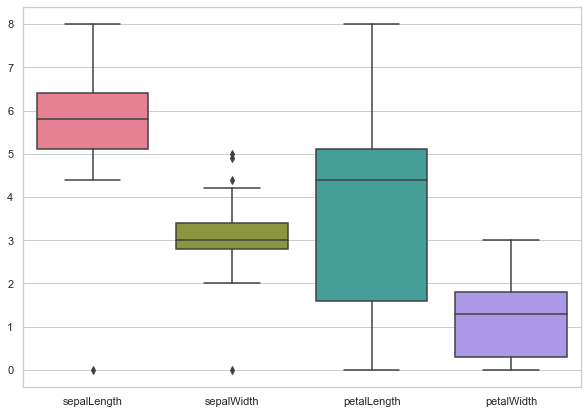

In [180]:
#se reemplaza los valores nan (default)
df.replace({'default':0},
               inplace=True)
#datos
datos = df[['sepalLength','sepalWidth','petalLength','petalWidth']]
sns.set(style="whitegrid")

#figura
fig = plt.figure(figsize =(10, 7))
 
#gráfico
sns.boxplot(data=datos, palette=('husl'))
 
# Se muestra el gráfico
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [181]:
#definiendo los límites del diagrama de caja:
ric,l1,l2=np.zeros((3,3))
q=df.quantile([0.25,0.75], axis=0).to_numpy() #determinar quantil 1 y 3 y pasarlo a array

ric=q[1,:]-q[0,:]

l1=q[0,:]-1.5*ric #límite inferior
l2=q[1,:]+1.5*ric #límite superior
print(l1[0])


for i in range(len(df)):
    
    if l1[0]>df.loc[i,'sepalLength'] or df.loc[i,'sepalLength']>l2[0] or l1[1]>df.loc[i,'sepalWidth'] or df.loc[i,'sepalWidth']> l2[1] or l1[2] >df.loc[i,'petalLength'] or df.loc[i,'petalLength']>l2[2] or l1[3]>df.loc[i,'petalWidth'] or df.loc[i,'petalWidth']> l2[3]:
        
        df.loc[i,'label']= 'fuera de rango'
    
    else:
        df.loc[i,'label']= 'en el rango'
    
df                         

3.1499999999999986


,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,en el rango
1,7.2,3.6,6.1,2.5,virginica,en el rango
2,6.3,3.3,6.0,2.5,virginica,en el rango
3,6.7,3.3,5.7,2.5,virginica,en el rango
4,6.3,3.4,5.6,2.4,virginica,en el rango
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,en el rango
146,4.8,3.0,1.4,0.1,setosa,en el rango
147,4.9,3.1,1.5,0.1,setosa,en el rango
148,4.9,3.6,1.4,0.1,setosa,en el rango


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

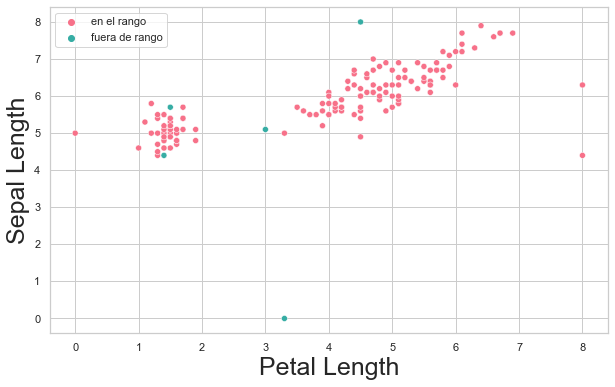

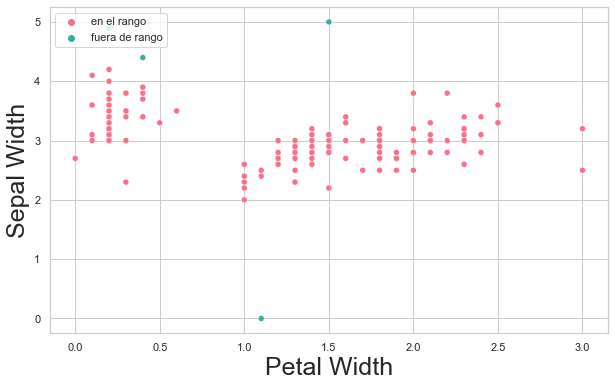

In [182]:
# grafico #1 de puntos
plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 6)

sns.scatterplot(
    x='petalLength',
    y='sepalLength',
    hue='label',# color por label
    data=df,
    ci = None,
    palette='husl'
)   
plt.xlabel('Petal Length', size=25)
plt.ylabel('Sepal Length',size=25)
plt.legend(loc='upper left')
plt.show()

# grafico #2 de puntos
plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 6)
sns.scatterplot(
    x='petalWidth',
    y='sepalWidth',
    hue='label',# color por label
    data=df,
    ci = None,
    palette='husl'
)   
plt.xlabel('Petal Width', size=25)
plt.ylabel('Sepal Width',size=25)
plt.legend(loc='upper left')
plt.show()


A partir del primer gráfico, se observan 4 de 5 puntos "fuera de rango" que a simple vista coinciden con la tendencia de 2 grupos de datos, lo que indicaría un error de categoría y que probablemente si estuviesen ingresados correctamente estarían dentro del rango.
Por otro lado, en el segundo gráfico se observa solo 1 de 3 puntos que comparte el comportamiento de un grupo de datos y, al igual que lo concluido ateriormente, indicaría un error de categoría que puede ser solucionado.

Finalmente, a partir de ambos gráficos se puede resaltar la importancia de analizar los datos fuera de rango antes de sacarlos de la base de datos ya que una confusión de categoría puede ser solucionada.

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

In [183]:
df1=df.groupby('label').get_group('en el rango')
df1

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,en el rango
1,7.2,3.6,6.1,2.5,virginica,en el rango
2,6.3,3.3,6.0,2.5,virginica,en el rango
3,6.7,3.3,5.7,2.5,virginica,en el rango
4,6.3,3.4,5.6,2.4,virginica,en el rango
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,en el rango
146,4.8,3.0,1.4,0.1,setosa,en el rango
147,4.9,3.1,1.5,0.1,setosa,en el rango
148,4.9,3.6,1.4,0.1,setosa,en el rango


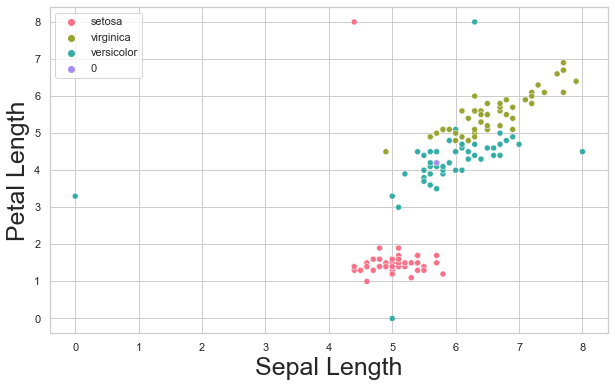

In [184]:
# grafico #1 de puntos
plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 6)

sns.scatterplot(
    x='sepalLength',
    y='petalLength',
    hue='species',# color por label
    data=df,
    ci = None,
    palette='husl'
)   
plt.xlabel('Sepal Length', size=25)
plt.ylabel('Petal Length',size=25)
plt.legend(loc='upper left')
plt.show()


A partir de este gráfico se observa que el punto que no tiene identificada su especie, podría ser versicolor, si se analiza que su data se encuentre en el rango, podría ser agregado.
Además se aprecia claramente algunos datos que salen del rango de comportamiento de su especie.